In [3]:
from google.colab import files
upload=files.upload()

Saving pizza_austin.csv to pizza_austin.csv


In [4]:
import pandas as pd
df_reviews=pd.read_csv("pizza_austin.csv")

In [5]:
df_reviews.drop(["Unnamed: 0","id"],inplace=True,axis=1)

In [6]:
df_reviews.head()

,restaurant,review
0,Home Slice Pizza,Somehow I lived in Austin for 22 years before ...
1,Home Slice Pizza,Always the go to for a slice in Austin. Super ...
2,Home Slice Pizza,We went on a Sunday night around 9:30pm during...
3,Home Slice Pizza,Came in here this past Saturday afternoon arou...
4,Home Slice Pizza,Without a side by side comparison available I ...


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords (you only need to do this once)
nltk.download('stopwords')

# Extract the comment column
comments = df_reviews[df_reviews['review'].apply(lambda x: isinstance(x, str))]['review']

# Get the NLTK English stop words
stop_words = set(stopwords.words('english'))

# Tokenize and preprocess the comments (remove punctuation, convert to lowercase, and remove stop words)
def preprocesstext(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize and convert to lowercase
    nswords = [word for word in words if word not in stop_words]
    return list(set(nswords))

# Tokenize and preprocess the comments, removing stop words
words_nostop = []
for comment in comments:
    words = preprocesstext(comment)
    words_nostop.extend(words)

# Calculate word frequencies
words_nostop_freq = pd.Series(words_nostop).value_counts()

wnf_df = pd.DataFrame(words_nostop_freq)
wnf_df = wnf_df.reset_index()
wnf_df = wnf_df.rename(columns={'index': 'words', 0: 'frequency'})

wnf_df.to_csv('review_words.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
from google.colab import files
upload=files.upload()

Saving Pizza Preferences.csv to Pizza Preferences.csv


In [9]:
preferred_df=pd.read_csv("Pizza Preferences.csv")
preferred_df

,words,frequency
0,service,10826
1,crust,6593
2,cheese,5969
3,sauce,5190
4,fresh,4599
5,beer,4316
6,atmosphere,3549
7,drinks,3287
8,pepperoni,3041
9,chicken,2929


In [10]:
selected_attributes =["ambiance","spicy","flavorful","unique"]

In [11]:
df1=df_reviews.copy()

df1["cleaned_review_wo_stopwords"] = df1["review"].astype(str).apply(lambda review: preprocesstext(review))

In [12]:
df1.head()

,restaurant,review,cleaned_review_wo_stopwords
0,Home Slice Pizza,Somehow I lived in Austin for 22 years before ...,"[soft, pizza, top, italian, home, salty, slice..."
1,Home Slice Pizza,Always the go to for a slice in Austin. Super ...,"[retired, struggle, super, find, pizza, marghe..."
2,Home Slice Pizza,We went on a Sunday night around 9:30pm during...,"[labor, bigger, bite, sat, maybe, felt, us, yo..."
3,Home Slice Pizza,Came in here this past Saturday afternoon arou...,"[sits, appetite, bar, bite, delicious, sized, ..."
4,Home Slice Pizza,Without a side by side comparison available I ...,"[large, know, act, go, within, eat, opted, wai..."


In [13]:
Reviews_Count = df1.groupby("restaurant")["review"].count().sort_values(ascending=False)


In [14]:
rank_df=pd.DataFrame({"restaurant":Reviews_Count.index.values.tolist(),
                      "count_of_reviews":Reviews_Count.values.tolist(),
                      "Rank":Reviews_Count.rank(ascending=False, method='min').astype("int").values.tolist()})

In [15]:
rank_df

,restaurant,count_of_reviews,Rank
0,Home Slice Pizza,5362,1
1,Via 313 Pizza,3677,2
2,Salty Sow,3222,3
3,Pinthouse Pizza,2163,4
4,Little Deli & Pizzeria,1525,5
...,...,...,...
107,Roppolo’s Pizzeria West Campus,10,90
108,Boss Pizza,10,90
109,Possum Pizza,10,90
110,Pizza Hut,10,90


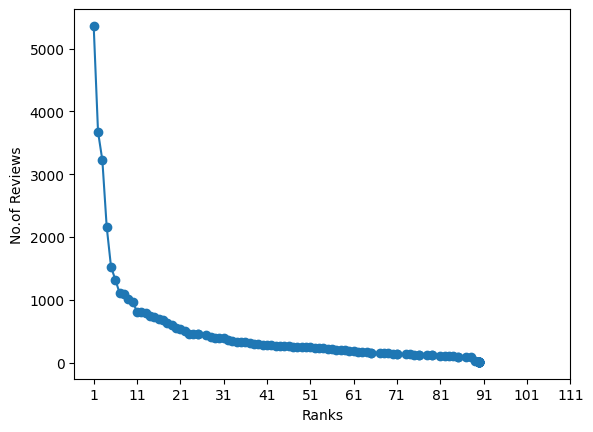

In [16]:
plt.plot(rank_df["Rank"],rank_df["count_of_reviews"],marker="o")
plt.xticks(range(1,len(rank_df["Rank"]),10))
plt.xlabel("Ranks")
plt.ylabel("No.of Reviews")
plt.show()

In [17]:
def lift(n, x, y, xy):
    return ((n*xy)/(x*y))

In [18]:
lift_df=df1[["restaurant","review","cleaned_review_wo_stopwords"]].apply(pd.Series.explode).drop_duplicates().copy(deep=True)

In [19]:
#lift_chart=pd.DataFrame(columns=["restaurant","attribute","lift_value"])

unique_resturants=lift_df["restaurant"].drop_duplicates().values.tolist()

lift_values=[]

for restaurant in unique_resturants:
    for attr in selected_attributes:
        n=df1["review"].count()
        x=df1[df1["restaurant"]==restaurant]["review"].count()
        y=lift_df["cleaned_review_wo_stopwords"].value_counts()[attr]
        xy=lift_df[(lift_df["restaurant"]==restaurant) & (lift_df["cleaned_review_wo_stopwords"]==attr)]["review"].count()
        lift_val=lift(n,x,y,xy)
        lift_dict={}
        lift_dict["restaurant"]=restaurant
        lift_dict["attribute"]=attr
        lift_dict["lift_value"]=lift_val
        lift_values.append(lift_dict)
lift_chart=pd.DataFrame(lift_values)

In [20]:
summary_table=pd.crosstab(lift_chart["restaurant"],lift_chart["attribute"],lift_chart["lift_value"],aggfunc=np.mean)
summary_table

attribute,ambiance,flavorful,spicy,unique
restaurant,,,,
ARTIPASTA,0.364987,2.254898,0.174916,0.622792
Austin Beer Garden Brewing Company,0.928770,0.870940,0.953789,1.245198
Austin's Pizza Braker,0.330065,0.382341,0.474540,0.000000
Austin's Pizza Four Points,0.000000,0.425699,0.000000,0.000000
Austin's Pizza Southpark Meadows,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...
Wanderlust Wine - Shady Lane,3.564706,0.000000,0.000000,4.561953
Woody's Pizza,0.000000,0.550571,0.683337,0.000000
Yaghi's New York Pizzeria,0.197673,0.457961,0.663128,0.084324


In [29]:
filtered_df=summary_table[(summary_table>1).all(axis=1)]
filtered_df


attribute,ambiance,flavorful,spicy,unique
restaurant,,,,
Baldinucci Pizza Romana,2.921890,1.353863,2.520506,1.495722
FoodHeads,1.068287,1.563135,4.365166,2.734294
Olive & June,3.544160,1.606493,1.181563,1.511887
Patrizi's,2.795203,2.285580,1.702039,2.104222
REVUE,2.564537,1.782424,1.843535,1.969188
The Backspace,2.185446,1.462688,1.186996,1.367343


In [30]:
merged_df = pd.merge(filtered_df, rank_df, on="restaurant").set_index("restaurant")
merged_df

,ambiance,flavorful,spicy,unique,count_of_reviews,Rank
restaurant,,,,,,
Baldinucci Pizza Romana,2.921890,1.353863,2.520506,1.495722,122,76
FoodHeads,1.068287,1.563135,4.365166,2.734294,634,18
Olive & June,3.544160,1.606493,1.181563,1.511887,694,16
Patrizi's,2.795203,2.285580,1.702039,2.104222,1084,8
REVUE,2.564537,1.782424,1.843535,1.969188,139,70
The Backspace,2.185446,1.462688,1.186996,1.367343,734,14


In [31]:
merged_df.index

Index(['Baldinucci Pizza Romana', 'FoodHeads', 'Olive & June', 'Patrizi's',
       'REVUE', 'The Backspace'],
      dtype='object', name='restaurant')

In [32]:
top7_list=rank_df["restaurant"][:7].values.tolist()
top7_df=summary_table.loc[top7_list,:]
top7_df

attribute,ambiance,flavorful,spicy,unique
restaurant,,,,
Home Slice Pizza,0.525199,0.785503,0.258067,0.536000
Via 313 Pizza,0.416868,0.853482,0.599337,1.215859
Salty Sow,2.013583,1.614803,0.588535,2.166291
Pinthouse Pizza,0.461451,0.534535,0.876681,1.265452
Little Deli & Pizzeria,0.444127,0.595700,0.672135,0.358973
DeSano Pizzeria Napoletana,0.675646,1.158328,1.087951,0.691729
Eureka! - Austin,1.520337,0.974241,2.418344,1.076323


In [25]:
top7_df_inc_rank=pd.merge(top7_df,rank_df,on="restaurant").set_index("restaurant")
top7_df_inc_rank

,ambiance,flavorful,spicy,unique,count_of_reviews,Rank
restaurant,,,,,,
Home Slice Pizza,0.525199,0.785503,0.258067,0.536000,5362,1
Via 313 Pizza,0.416868,0.853482,0.599337,1.215859,3677,2
Salty Sow,2.013583,1.614803,0.588535,2.166291,3222,3
Pinthouse Pizza,0.461451,0.534535,0.876681,1.265452,2163,4
Little Deli & Pizzeria,0.444127,0.595700,0.672135,0.358973,1525,5
DeSano Pizzeria Napoletana,0.675646,1.158328,1.087951,0.691729,1319,6
Eureka! - Austin,1.520337,0.974241,2.418344,1.076323,1102,7


In [35]:
#word2vec
!pip install spacy
!python -m spacy download en_core_web_md
import spacy
nlp = spacy.load("en_core_web_md")
def calculate_similarity(nlp, attribute, review):
    attribute_doc = nlp(attribute)
    review_doc = nlp(review)
    return attribute_doc.similarity(review_doc)



att_str = " ".join(selected_attributes)
att_str

2023-10-12 00:06:04.853341: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 10.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


'ambiance spicy flavorful unique'

In [36]:
product_scores_ind = {}

for product_name, group in df1.groupby("restaurant"):
    product_scores_ind[product_name] = {}
    scores_i = [calculate_similarity(nlp,att_str, review) for review in group["review"]]
    avg_score_i = sum(scores_i) / len(scores_i)
    product_scores_ind[product_name] = avg_score_i

df_wv_ind = pd.DataFrame(list(product_scores_ind.items()), columns=['restaurant', 'sim_score_wb'])
df_wv_ind.sort_values(by='sim_score_wb',ascending=False)

,restaurant,sim_score_wb
13,Bat City Pies,0.480734
30,Fast Friends Beer,0.475960
88,South Flo Pizza In H-E-B,0.474803
32,FoodHeads,0.474433
11,Baldinucci Pizza Romana,0.473515
...,...,...
45,Little Woodrow's Burnet,0.414377
57,Mr Gatti's Pizza Riverside,0.407474
66,Papa Johns Pizza,0.401194
26,Domino's Pizza,0.388110


**Recommendations from Word2Vec**

In [40]:
word_vec_df=df_wv_ind.sort_values(by='sim_score_wb',ascending=False)[:5]
wv_merged_rank=pd.merge(word_vec_df,rank_df,on="restaurant").set_index("restaurant")
wv_merged_rank

,sim_score_wb,count_of_reviews,Rank
restaurant,,,
Bat City Pies,0.480734,10,90
Fast Friends Beer,0.475960,10,90
South Flo Pizza In H-E-B,0.474803,10,90
FoodHeads,0.474433,634,18
Baldinucci Pizza Romana,0.473515,122,76


**Recommendations from Lift**

In [53]:
merged_df

,ambiance,flavorful,spicy,unique,count_of_reviews,Rank
restaurant,,,,,,
Baldinucci Pizza Romana,2.921890,1.353863,2.520506,1.495722,122,76
FoodHeads,1.068287,1.563135,4.365166,2.734294,634,18
Olive & June,3.544160,1.606493,1.181563,1.511887,694,16
Patrizi's,2.795203,2.285580,1.702039,2.104222,1084,8
REVUE,2.564537,1.782424,1.843535,1.969188,139,70
The Backspace,2.185446,1.462688,1.186996,1.367343,734,14


In [41]:
!pip install bertopic

  Using cached bertopic-0.15.0-py2.py3-none-any.whl (143 kB)
  Using cached hdbscan-0.8.33.tar.gz (5.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [42]:
import pandas as pd
import numpy as np
import pandas as pd
import io

In [43]:
# List of restaurant names to filter
restaurant_names = [
    'Home Slice Pizza',
    'Via 313 Pizza',
    'Salty Sow',
    'Pinthouse Pizza',
    'Little Deli & Pizzeria',
    'DeSano Pizzeria Napoletana',
    'Eureka! - Austin'
]

# Filter df1 based on the specified restaurant names and select the "reviews" column
filtered_df1 = df1[df1['restaurant'].isin(restaurant_names)][["cleaned_review_wo_stopwords"]]

In [44]:
# Define a custom function to join a list of words into a sentence
def list_to_sentence(word_list):
    return ' '.join(word_list)

# Apply the custom function to each cell in the 'words_list' column
filtered_df1['cleaned_review'] = filtered_df1["cleaned_review_wo_stopwords"].apply(list_to_sentence)

In [45]:
import pandas as pd
import numpy as np
from bertopic import BERTopic
import pandas as pd
import io

In [46]:
model = BERTopic(verbose=True)

#convert to list
docs = filtered_df1['cleaned_review'].tolist()
topics, probabilities = model.fit_transform(docs)
model.get_topic_freq()

Batches:   0%|          | 0/575 [00:00<?, ?it/s]

2023-10-12 00:37:30,433 - BERTopic - Transformed documents to Embeddings
2023-10-12 00:38:12,218 - BERTopic - Reduced dimensionality
2023-10-12 00:38:17,431 - BERTopic - Clustered reduced embeddings


,Topic,Count
0,-1,11490
3,0,944
4,1,704
75,2,363
18,3,307
...,...,...
60,96,11
40,97,10
41,98,10
37,99,10


In [47]:
model.visualize_barchart()

In [48]:
# List of restaurant names to filter
restaurant_names = ['Austin Beer Garden Brewing Company', 'Baldinucci Pizza Romana',
       'Bufalina Due', 'Cipollina', 'Corner', 'Cucina On 35th',
       'DeSano Pizzeria Napoletana', 'Delucca Gaucho Pizza & Wine Austin',
       'Eureka! - Austin', 'FoodHeads', 'Intero Restaurant',
       "Nik's Italian Kitchen + Bar", "North Italia", 'Nosh & Bevvy',
       'Olive & June', "Patrizi's", "Pinthouse Brewing", 'REVUE', 'Salty Sow',
       'Siena Ristorante Toscana', 'Sour Duck Market', 'The Backspace','The Carillon']

# Filter df1 based on the specified restaurant names and select the "reviews" column
filtered_df2 = df1[df1['restaurant'].isin(restaurant_names)][["cleaned_review_wo_stopwords"]]

In [49]:
# Define a custom function to join a list of words into a sentence
def list_to_sentence(word_list):
    return ' '.join(word_list)

# Apply the custom function to each cell in the 'words_list' column
filtered_df2['cleaned_review'] = filtered_df2["cleaned_review_wo_stopwords"].apply(list_to_sentence)

In [50]:
filtered_df3=df1[df1['restaurant'].isin(restaurant_names)][["review"]]
filtered_df3

,review
8300,I am not sure why more people aren't talking a...
8301,"The pizza was delicious. Authentic, woodfired,..."
8302,"After just one bite, I'm instantly transported..."
8303,Incredible pie. Watch out. If you purchase a s...
8304,Food: 5/5\nAmbiance: 4/5\n\nOne of the best pi...
...,...
43054,After meeting the owner recently I was encoura...
43055,I love their fish torta. It is light and delic...
43056,foodheads is so super cute! and they have grea...
43057,awesome sandwiches. we had the beef and brie a...


In [51]:
model1 = BERTopic(nr_topics=10,verbose=True)

#convert to list
docs = filtered_df2['cleaned_review'].tolist()
topics, probabilities = model1.fit_transform(docs)
model1.get_topic_freq()

Batches:   0%|          | 0/444 [00:00<?, ?it/s]

2023-10-12 00:38:34,906 - BERTopic - Transformed documents to Embeddings
2023-10-12 00:38:49,867 - BERTopic - Reduced dimensionality
2023-10-12 00:38:50,517 - BERTopic - Clustered reduced embeddings
2023-10-12 00:38:52,424 - BERTopic - Reduced number of topics from 91 to 10


,Topic,Count
1,-1,8529
3,0,3737
0,1,875
2,2,710
8,3,100
7,4,93
9,5,76
5,6,44
6,7,18
4,8,12


In [52]:
model1.visualize_barchart()